In [10]:
from linares_plot import *

In [11]:
sep_channels=10
adjusted_size_contant = 48.519

pos_channels = np.arange(sep_channels/2,360,sep_channels)
pos_channels = [round(pos_channels[i],3) for i in range(0, len(pos_channels))]

pos_channels2 = np.arange(0,360,0.5)
pos_channels2 = [round(pos_channels2[i],3) for i in range(0, len(pos_channels2))]

def posch1_to_posch2(ch_1):
    return np.where(np.array(pos_channels2) == pos_channels[ch_1])[0][0]

In [17]:
def Representation_heatmap(df, condition='1_0.2', ref_angle=180, TR=2.335, bin_=0.5, fs1=20, fs2=15):
    ##
    ##
    ##### pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
    pal_cyan = 'viridis'
    #
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(df, cmap=pal_cyan, vmin=-0.2, vmax=0.2,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [-0.2, -0.1, 0, 0.1, 0.2], 'label': 'reconstruction activation (a.u)'})
    ax.figure.axes[-1].yaxis.label.set_size(fs1)
    ax.figure.axes[-1].tick_params(labelsize=fs2)
    
    plt.gca().set_ylabel('')
    plt.yticks([posch1_to_posch2(4), posch1_to_posch2(13), posch1_to_posch2(22), posch1_to_posch2(31)],['45','135','225', '315'])

    dims=np.shape(df)
    dimN = dims[0]
    plt.gca().set_ylim(dimN, -45)
    
    plt.plot([1,1], [posch1_to_posch2(18),posch1_to_posch2(18)], markersize=10, color='r', marker='>')
    
    ################################
    presentation_period= 0.35 #stim presnetation time
    presentation_period_cue=  0.50 #presentation of attentional cue time
    pre_stim_period= 0.5 #time between cue and stim
    resp_time = 4  #time the response is active
    start_hrf = 4  #start of the Hemodynamic response (4seconds)
    if condition == '1_0.2':
        condition_title = 'o:1, d:0.2'
        delay1 = 0.2
        delay2 = 11.8
        cue=0
        t_p = cue + presentation_period_cue + pre_stim_period 
        d_p = t_p + presentation_period +delay1 
        r_t = d_p + presentation_period + delay2
        xlim = [1/TR, 30/TR]
    elif condition=='1_7':
        condition_title = 'o:1, d:7'
        delay1 = 7
        delay2 = 5
        cue=0
        t_p = cue + presentation_period_cue + pre_stim_period 
        d_p = t_p + presentation_period +delay1 
        r_t = d_p + presentation_period + delay2
        xlim = [1/TR, 30/TR]
    elif condition=='2_0.2':
        condition_title = 'o:2, d:0.2'
        delay1 = 0.2
        delay2 = 12
        cue=0
        d_p = cue + presentation_period_cue + pre_stim_period 
        t_p = d_p + presentation_period +delay1 
        r_t = t_p + presentation_period + delay2   
        xlim = [1/TR, 30/TR]
    elif condition=='2_7':
        condition_title = 'o:2, d:7'
        delay1 = 7
        delay2 = 12
        cue=0
        d_p = cue + presentation_period_cue + pre_stim_period 
        t_p = d_p + presentation_period +delay1 
        r_t = t_p + presentation_period + delay2
        xlim = [1/TR, 35/TR]
    ##
    ##
    t_p1 = (start_hrf + t_p) ## strat of target (time)
    d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
    r_p1=  (start_hrf + r_t) ## start of response (time)
    ##
    plt.plot([t_p1/TR +bin_,t_p1/TR+bin_], [-15,-15], markersize=10, color='b', marker='v')
    plt.plot([d_p1/TR +bin_,d_p1/TR+bin_], [-15,-15], markersize=10, color='g', marker='v')
    plt.plot([r_p1/TR +bin_,r_p1/TR+bin_], [-15,-15], markersize=10, color='y', marker='v')
    plt.gca().set_xlim(xlim)
    
    plt.xticks(fontsize=fs2)
    plt.yticks(fontsize=fs2)
    plt.gca().set_ylabel('angle ($^\circ$)', fontsize=fs1)
    plt.gca().set_xlabel('time (s)', fontsize=fs1)
    #plt.title(condition_title)
    
    plt.show()
    

In [18]:
Df = pd.read_excel('C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_example_hetm.xlsx')

In [19]:
Df.head()

Unnamed: 0       0.0     2.335      4.67     7.005      9.34    11.675  \
0           0 -0.104967 -0.117022  0.043870  0.118454  0.097774  0.175396   
1           1 -0.104913 -0.116290  0.044775  0.118663  0.097947  0.175947   
2           2 -0.104936 -0.115547  0.045739  0.118960  0.098080  0.176357   
3           3 -0.104964 -0.114690  0.046808  0.119288  0.098152  0.176489   
4           4 -0.104991 -0.113693  0.047921  0.119573  0.098181  0.176577   

      14.01    16.345     18.68    21.015     23.35    25.685     28.02  \
0 -0.003503 -0.074797 -0.125978 -0.163051 -0.025641  0.086827  0.089137   
1 -0.002783 -0.076918 -0.130472 -0.164787 -0.023353  0.090550  0.092871   
2 -0.001916 -0.078882 -0.134973 -0.166541 -0.021174  0.094158  0.096647   
3 -0.000872 -0.080586 -0.139313 -0.168121 -0.019183  0.097338  0.100130   
4  0.000238 -0.082217 -0.143640 -0.169646 -0.017342  0.100241  0.103477   

     30.355     32.69    35.025  
0  0.103442  0.049734 -0.072350  
1  0.105180  0.048180 -0.075249  
2  0.106895  0.046530 -0.078132  
3  0.108576  0.044977 -0.080814  
4  0.110197  0.043463 -0.083332

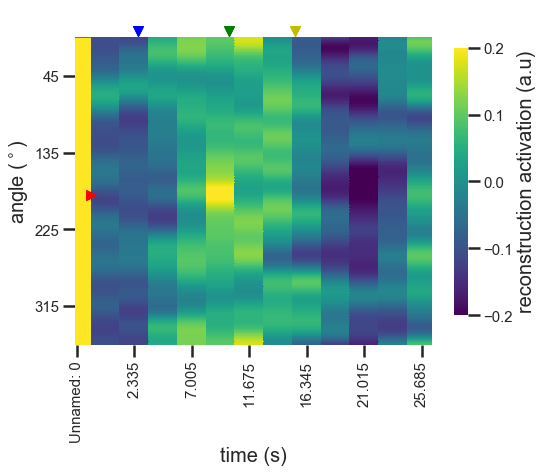

In [20]:
Representation_heatmap(Df, condition='1_7')

In [21]:
all_[0]

NameError: name 'all_' is not defined

In [22]:
#### Heatmaps of mean of reconstructions

In [23]:
xl = pd.ExcelFile('C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\/IEM_example_cross_recons.xlsx')
xl.sheet_names 

['n001_pfc_1_7',
 'n001_ips_1_7',
 's001_visual_1_7',
 's001_ips_1_7',
 'b001_ips_1_7',
 'l001_visual_1_7',
 'l001_pfc_1_7',
 'n001_visual_1_7',
 'b001_pfc_1_7',
 'r001_visual_1_7',
 'd001_ips_1_7',
 'd001_pfc_1_7',
 'd001_visual_1_7',
 'r001_ips_1_7',
 'l001_ips_1_7',
 's001_pfc_1_7',
 'r001_pfc_1_7',
 'b001_visual_1_7']

In [24]:
VISUAL=[]
for idx,s in enumerate(['n001', 'd001', 'r001', 'l001', 's001', 'b001']):
    Df = pd.read_excel('C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\/IEM_example_cross_recons.xlsx', 
                       s+'_visual_1_7')
    VISUAL.append(Df)


VISUAL_heatmap = pd.concat(VISUAL).groupby(level=0).mean()

In [51]:

def Representation_heatmap(df, condition='1_0.2', ref_angle=180, TR=2.335, bin_=0.5, fs1=20, fs2=15):
    ##
    ##
    ##### pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
    pal_cyan = 'viridis'
    #
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(df, cmap=pal_cyan, vmin=-0.2, vmax=0.2,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [-0.2, -0.1, 0, 0.1, 0.2], 'label': 'reconstruction (a.u)'})
    ax.figure.axes[-1].yaxis.label.set_size(fs1)
    ax.figure.axes[-1].tick_params(labelsize=fs2)
    
    plt.gca().set_ylabel('')
    plt.yticks([posch1_to_posch2(4), posch1_to_posch2(13), posch1_to_posch2(22), posch1_to_posch2(31)],['45','135','225', '315'])

    dims=np.shape(df)
    dimN = dims[0]
    plt.gca().set_ylim(dimN, -45)
    
    plt.plot([0.5, 0.5], [posch1_to_posch2(18),posch1_to_posch2(18)], markersize=20, color='grey', marker='>')
    plt.plot([1, 23.5], [posch1_to_posch2(18),posch1_to_posch2(18)], color='grey', linestyle='--', linewidth=1.5)
    
    ################################
    presentation_period= 0.35 #stim presnetation time
    presentation_period_cue=  0.50 #presentation of attentional cue time
    pre_stim_period= 0.5 #time between cue and stim
    resp_time = 4  #time the response is active
    start_hrf = 4  #start of the Hemodynamic response (4seconds)
    if condition == '1_0.2':
        condition_title = 'o:1, d:0.2'
        delay1 = 0.2
        delay2 = 11.8
        cue=0
        t_p = cue + presentation_period_cue + pre_stim_period 
        d_p = t_p + presentation_period +delay1 
        r_t = d_p + presentation_period + delay2
        xlim = [1/TR, 25/TR]
    elif condition=='1_7':
        condition_title = 'o:1, d:7'
        delay1 = 7
        delay2 = 5
        cue=0
        t_p = cue + presentation_period_cue + pre_stim_period 
        d_p = t_p + presentation_period +delay1 
        r_t = d_p + presentation_period + delay2
        xlim = [1/TR, 25/TR]
    elif condition=='2_0.2':
        condition_title = 'o:2, d:0.2'
        delay1 = 0.2
        delay2 = 12
        cue=0
        d_p = cue + presentation_period_cue + pre_stim_period 
        t_p = d_p + presentation_period +delay1 
        r_t = t_p + presentation_period + delay2   
        xlim = [1/TR, 25/TR]
    elif condition=='2_7':
        condition_title = 'o:2, d:7'
        delay1 = 7
        delay2 = 12
        cue=0
        d_p = cue + presentation_period_cue + pre_stim_period 
        t_p = d_p + presentation_period +delay1 
        r_t = t_p + presentation_period + delay2
        xlim = [1/TR, 30/TR]
    ##
    ##
    t_p1 = (start_hrf + t_p) ## strat of target (time)
    d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
    r_p1=  (start_hrf + r_t) ## start of response (time)
    ##
    plt.plot([t_p1/TR +bin_,t_p1/TR+bin_], [-15,-15], markersize=10, color='grey', marker='v')
    plt.plot([d_p1/TR +bin_,d_p1/TR+bin_], [-15,-15], markersize=10, color='darkred', marker='v')
    plt.plot([r_p1/TR +bin_,r_p1/TR+bin_], [-15,-15], markersize=10, color='y', marker='v')
    plt.gca().set_xlim(xlim)
    
    plt.xticks(fontsize=fs2)
    plt.yticks(fontsize=fs2)
    plt.gca().set_ylabel('angle ($^\circ$)', fontsize=fs1)
    plt.gca().set_xlabel('time (s)', fontsize=fs1)
    #plt.title(condition_title)
    
    plt.show()


    

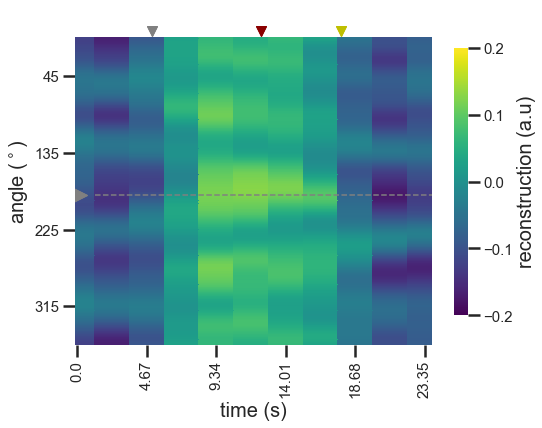

In [47]:
Representation_heatmap(VISUAL_heatmap.iloc[:, 1:], condition='1_7')

In [50]:
len(VISUAL)

6

In [48]:
VISUAL_heatmap

Unnamed: 0       0.0     2.335      4.67     7.005      9.34    11.675  \
0             0 -0.123007 -0.164981 -0.092726  0.028599  0.063612  0.049733   
1             1 -0.123132 -0.164805 -0.091997  0.029035  0.063753  0.049564   
2             2 -0.123215 -0.164552 -0.091239  0.029446  0.063912  0.049439   
3             3 -0.123217 -0.164202 -0.090433  0.029824  0.064089  0.049367   
4             4 -0.123225 -0.163833 -0.089607  0.030181  0.064310  0.049356   
..          ...       ...       ...       ...       ...       ...       ...   
715         715 -0.121547 -0.164596 -0.095619  0.026263  0.063391  0.051293   
716         716 -0.121989 -0.164902 -0.095180  0.026743  0.063398  0.050920   
717         717 -0.122297 -0.165028 -0.094642  0.027225  0.063388  0.050538   
718         718 -0.122603 -0.165121 -0.094066  0.027717  0.063467  0.050234   
719         719 -0.122835 -0.165094 -0.093427  0.028142  0.063510  0.049955   

        14.01    16.345     18.68    21.015     23.35    25.685     28.02  \
0    0.066369  0.032373 -0.047185 -0.103863 -0.082184 -0.024825  0.006732   
1    0.065984  0.031201 -0.047701 -0.103562 -0.081782 -0.024669  0.006745   
2    0.065583  0.029996 -0.048262 -0.103296 -0.081381 -0.024459  0.006847   
3    0.065146  0.028723 -0.048836 -0.103008 -0.080938 -0.024177  0.007056   
4    0.064757  0.027477 -0.049422 -0.102776 -0.080514 -0.023857  0.007348   
..        ...       ...       ...       ...       ...       ...       ...   
715  0.067881  0.037599 -0.044848 -0.105160 -0.083733 -0.024889  0.007863   
716  0.067688  0.036679 -0.045267 -0.104948 -0.083498 -0.024973  0.007476   
717  0.067408  0.035675 -0.045725 -0.104673 -0.083197 -0.025020  0.007154   
718  0.067074  0.034607 -0.046202 -0.104442 -0.082900 -0.024989  0.006946   
719  0.066764  0.033540 -0.046641 -0.104119 -0.082548 -0.024953  0.006777   

       30.355     32.69    35.025  
0    0.064926  0.125242  0.046166  
1    0.064996  0.125160  0.046355  
2    0.065094  0.125008  0.046513  
3    0.065204  0.124754  0.046641  
4    0.065333  0.124394  0.046736  
..        ...       ...       ...  
715  0.064739  0.124111  0.044579  
716  0.064747  0.124539  0.044985  
717  0.064772  0.124843  0.045322  
718  0.064828  0.125119  0.045648  
719  0.064853  0.125198  0.045912  

[720 rows x 17 columns]

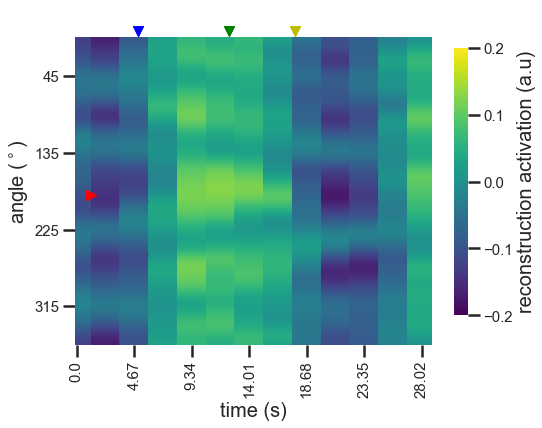

In [56]:
Representation_heatmap(VISUAL_heatmap.iloc[:, 1:], condition='1_7')

In [52]:
IPS=[]
for idx,s in enumerate(['n001', 'd001', 'r001', 'l001', 's001', 'b001']):
    Df = pd.read_excel('C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\/IEM_example_cross_recons.xlsx', 
                       s+'_ips_1_7')
    IPS.append(Df)


IPS_heatmap = pd.concat(IPS).groupby(level=0).mean()

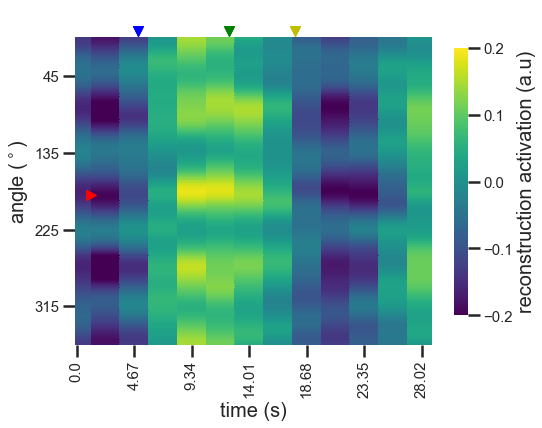

In [52]:
Representation_heatmap(IPS_heatmap.iloc[:, 1:], condition='1_7')

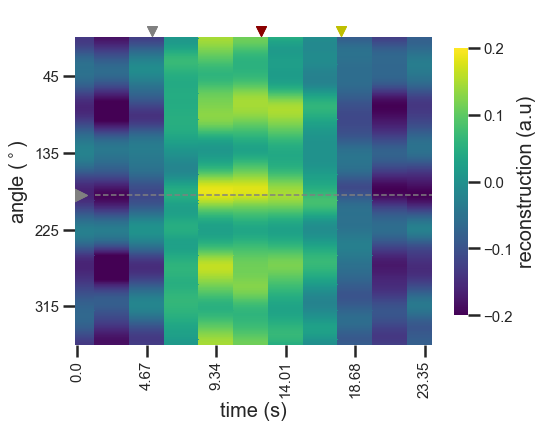

In [53]:
Representation_heatmap(IPS_heatmap.iloc[:, 1:], condition='1_7')

In [53]:
PFC=[]
for idx,s in enumerate(['n001', 'd001', 'r001', 'l001', 's001', 'b001']):
    Df = pd.read_excel('C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\/IEM_example_cross_recons.xlsx', 
                       s+'_pfc_1_7')
    PFC.append(Df)


PFC_heatmap = pd.concat(PFC).groupby(level=0).mean()

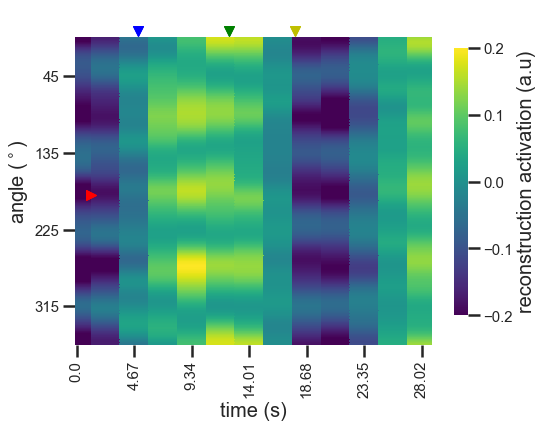

In [54]:
Representation_heatmap(PFC_heatmap.iloc[:, 1:], condition='1_7')

In [ ]:
## 1_7 train and test in target

In [6]:
xl = pd.ExcelFile('C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_heatmap_trainT_testT.xlsx')
xl.sheet_names 

['n001_ips_2_0.2',
 's001_visual_2_7',
 's001_pfc_1_0.2',
 'd001_pfc_2_7',
 'l001_ips_2_7',
 'l001_visual_1_7',
 'b001_pfc_1_0.2',
 'r001_ips_2_7',
 's001_ips_2_7',
 'r001_pfc_2_0.2',
 'l001_ips_1_0.2',
 'b001_pfc_1_7',
 'l001_visual_2_7',
 's001_visual_1_0.2',
 'n001_visual_1_0.2',
 'r001_visual_2_0.2',
 'r001_ips_2_0.2',
 'd001_visual_2_0.2',
 'r001_pfc_2_7',
 'n001_pfc_2_0.2',
 'l001_pfc_2_0.2',
 'd001_ips_1_0.2',
 'n001_ips_1_7',
 'b001_pfc_2_0.2',
 's001_ips_1_0.2',
 'l001_pfc_1_7',
 's001_ips_1_7',
 's001_pfc_2_7',
 'b001_ips_2_0.2',
 'd001_visual_1_7',
 'r001_ips_1_0.2',
 'r001_pfc_1_0.2',
 'd001_ips_2_0.2',
 's001_ips_2_0.2',
 'l001_pfc_2_7',
 'd001_pfc_2_0.2',
 's001_visual_2_0.2',
 'n001_ips_1_0.2',
 'n001_visual_2_7',
 'n001_ips_2_7',
 'b001_ips_1_7',
 'n001_pfc_1_7',
 'b001_visual_2_7',
 'd001_visual_2_7',
 'n001_visual_1_7',
 'n001_pfc_1_0.2',
 'b001_visual_1_0.2',
 'n001_pfc_2_7',
 'r001_visual_1_7',
 'l001_visual_2_0.2',
 's001_pfc_2_0.2',
 'r001_visual_1_0.2',
 'l001_pf

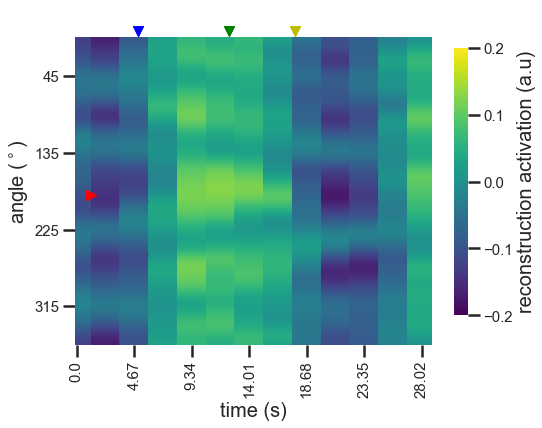

In [8]:
visual_1_7=[]
for idx,s in enumerate(['n001', 'd001', 'r001', 'l001', 's001', 'b001']):
    Df = pd.read_excel('C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_heatmap_trainT_testT.xlsx', 
                       s+'_visual_1_7')
    visual_1_7.append(Df)


visual_1_7 = pd.concat(visual_1_7).groupby(level=0).mean()

Representation_heatmap(visual_1_7.iloc[:, 1:], condition='1_7')

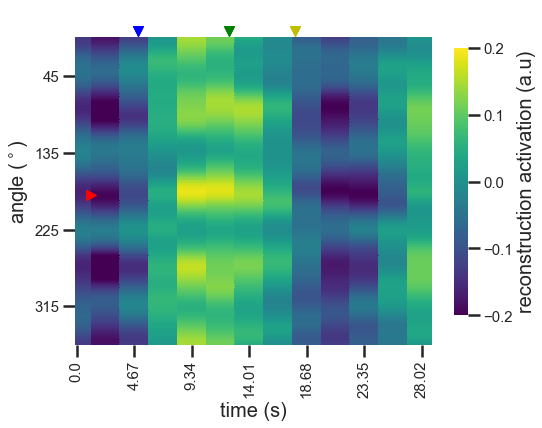

In [9]:
ips_1_7=[]
for idx,s in enumerate(['n001', 'd001', 'r001', 'l001', 's001', 'b001']):
    Df = pd.read_excel('C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_heatmap_trainT_testT.xlsx', 
                       s+'_ips_1_7')
    ips_1_7.append(Df)


ips_1_7 = pd.concat(ips_1_7).groupby(level=0).mean()

Representation_heatmap(ips_1_7.iloc[:, 1:], condition='1_7')

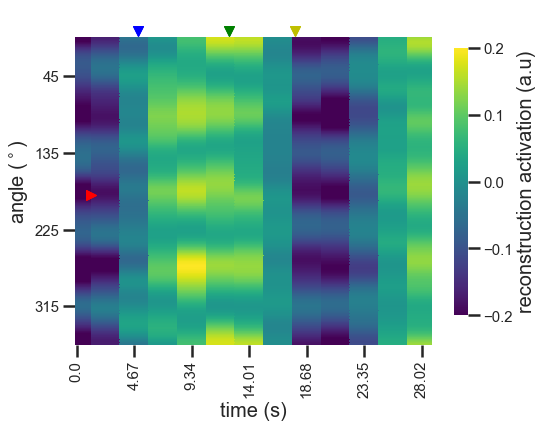

In [10]:
pfc_1_7=[]
for idx,s in enumerate(['n001', 'd001', 'r001', 'l001', 's001', 'b001']):
    Df = pd.read_excel('C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_heatmap_trainT_testT.xlsx', 
                       s+'_pfc_1_7')
    pfc_1_7.append(Df)


pfc_1_7 = pd.concat(pfc_1_7).groupby(level=0).mean()

Representation_heatmap(pfc_1_7.iloc[:, 1:], condition='1_7')

In [ ]:
## 2_7 train and test in target

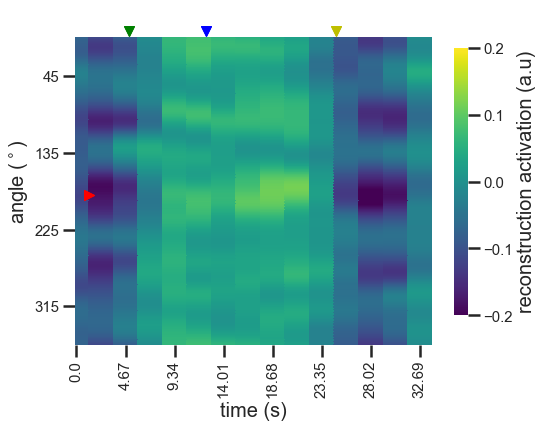

In [11]:
visual_2_7=[]
for idx,s in enumerate(['n001', 'd001', 'r001', 'l001', 's001', 'b001']):
    Df = pd.read_excel('C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_heatmap_trainT_testT.xlsx', 
                       s+'_visual_2_7')
    visual_2_7.append(Df)


visual_2_7 = pd.concat(visual_2_7).groupby(level=0).mean()

Representation_heatmap(visual_2_7.iloc[:, 1:], condition='2_7')

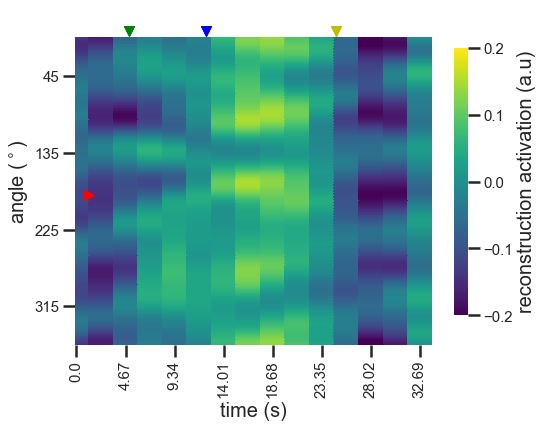

In [12]:
ips_2_7=[]
for idx,s in enumerate(['n001', 'd001', 'r001', 'l001', 's001', 'b001']):
    Df = pd.read_excel('C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_heatmap_trainT_testT.xlsx', 
                       s+'_ips_2_7')
    ips_2_7.append(Df)


ips_2_7 = pd.concat(ips_2_7).groupby(level=0).mean()

Representation_heatmap(ips_2_7.iloc[:, 1:], condition='2_7')

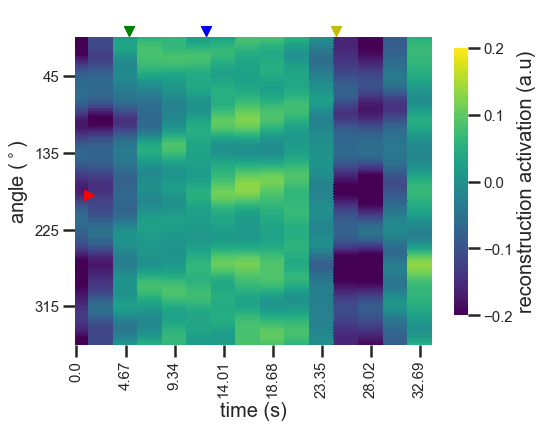

In [13]:
pfc_2_7=[]
for idx,s in enumerate(['n001', 'd001', 'r001', 'l001', 's001', 'b001']):
    Df = pd.read_excel('C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_heatmap_trainT_testT.xlsx', 
                       s+'_pfc_2_7')
    pfc_2_7.append(Df)


pfc_2_7 = pd.concat(pfc_2_7).groupby(level=0).mean()

Representation_heatmap(pfc_2_7.iloc[:, 1:], condition='2_7')